# LESSON 1

The common principle that underlies all supervised machine learning algorithms can be explained as follows: 

### Learning a function
Machine learning algorithms aim to **learn a target function $f$** that best maps input variables ($X$) to an output variable ($Y$):


$$ Y = f(X) $$

What function $f$ *exactly* is or *how* it looks, is not known. And exactly that (what the function $f$ has to be) is the part that Machine Learning tries to learn from the data.


### Making predictions

The main goal of machine learning is to learn the underlying function in order to **make predictions** of $Y$ for new $X$ (unseen data). When we *train* or *learn* a machine learning model we are *estimating* the target function (the target function is the best mapping from $Y$ given $X$ from the data that is available). Usually a lot of time is spent trying to improve this estimate of the unknown target function in order to improve performance of the predictions made by the model. 


### Different Learning Techniques

Each Machine Learning algorithm makes its own **assumptions about the shape and structure of the target function** and how to best optimize a representation to approximate it. As we mostly don't know anything about the target function, and so do not know beforehand which approach will make the best estimation of the target function it is important to investigate different machine learning algorithms in order to find out what works best. 

In [1]:
# loading libraries, some settings for plots
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## SECTION A

For this example we will use the Iris data set. This is a widely used dataset in tutorials and contains measurements of flower sizes of 3 different species of Iris flowers. Our **goal is to classify each flower to the species it belongs to** (the `label`), based on these measurements.

In [2]:
import sys
sys.path.insert(0, "..") 

We start by adding the parent directory to our `sys.path`.

In [5]:
%load_ext autoreload
%autoreload 2

from src.data import make_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


With this, we can load modules from the `src` directory. If you look into the
`src` directory, you will find the `data` folder. Inside that folder, you will
find the `make_dataset.py` file. We load contents of that file in our memory.
That way, we can access the functions in that file.

Check the file to see the functions that are there. The first function is
`get_iris()`. For now, this seems like an overkill, but this is just to show you
how it works.

In [6]:
df = make_dataset.get_iris()
type(df)

pandas.core.frame.DataFrame

As you might have seen already from the typehints where the function is defined, the outpunt of the
`.get_iris` function is a pandas DataFrame.

In [7]:
# What does the data look like?
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If we melt the dataframe into a long format, it is often easier to plot.

In [8]:
p = df.melt(id_vars = 'species')
p

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


Let's compare the distribution of the variables for all features between species. Do you think it should be easy for a model to split the species, based on these distributions? What makes it easy or hard? What do you learn from the data, if you look at the graphs below? Can you guess which variables are the most usefull for separating the classes?

<AxesSubplot:xlabel='variable', ylabel='value'>

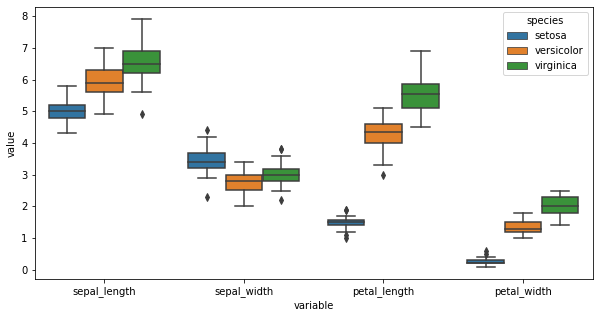

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data = p, x = 'variable', y='value', hue='species')

A slightly different approach to sort of the same result would be to use facetgrid.

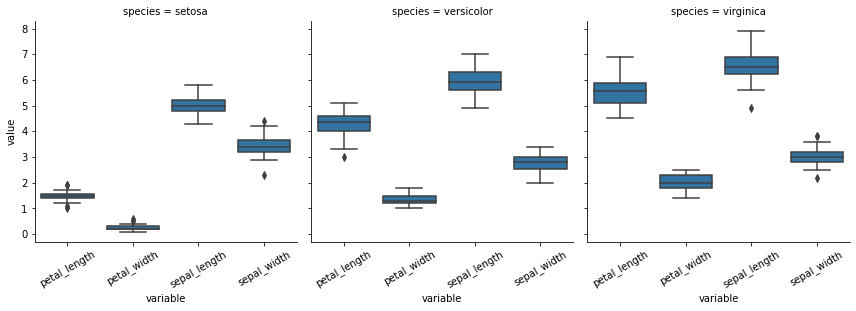

In [10]:
g = sns.FacetGrid(p, col='species', height=4)
var = np.unique(p.variable)
g.map(sns.boxplot, 'variable', 'value', order=var)
g.set_xticklabels(rotation=30)

While the facetgrid does not seem to add very much, if you want more complex facets it is very easy to simply specify a row.

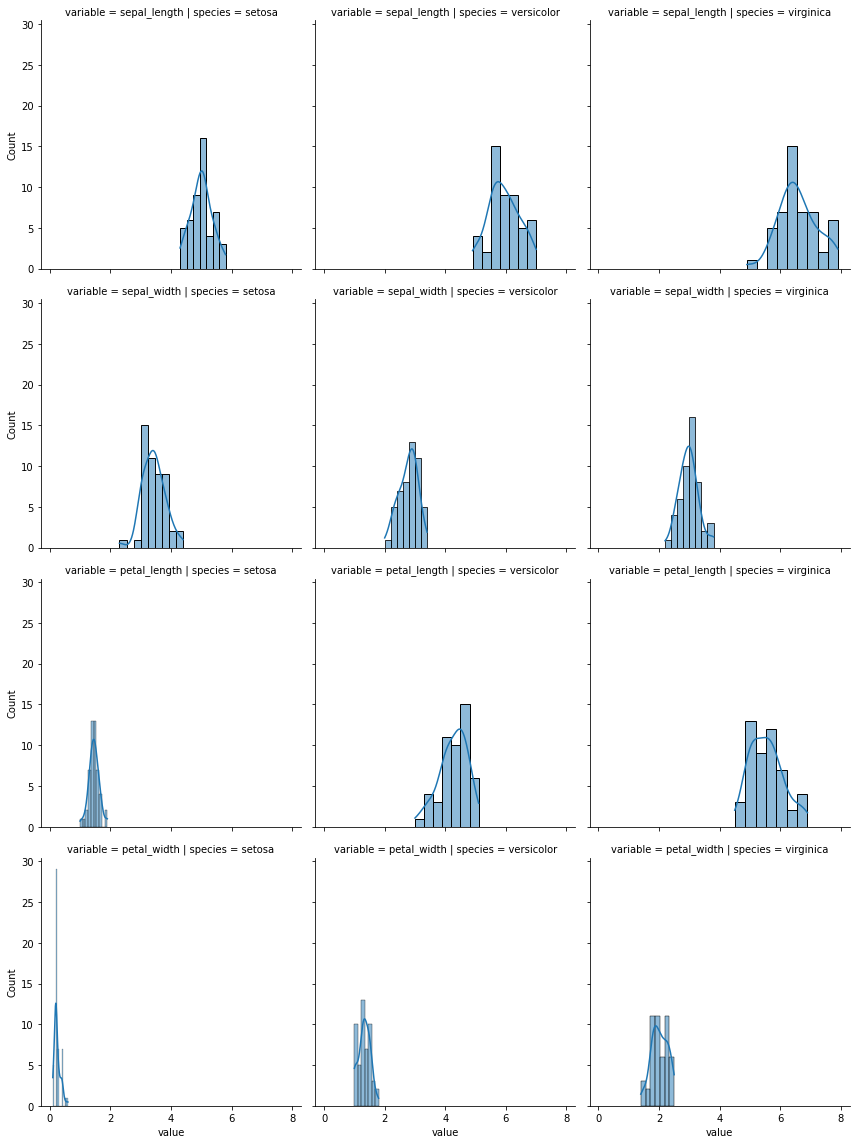

In [11]:
g = sns.FacetGrid(p, col='species', row='variable', height=4)
var = np.unique(p.variable)
g.map(sns.histplot, 'value', kde=True)

There are many approaches that have the same (or sort of the same) result.
You could completely create the facetgrid above with a more low-level approach through matplotlib.
The downside of this, is that it takes much more code. The upside could be, that because you have to define everything by hand, it is easier to do some weird things.
For example, let's say you wanted the middle subplot to have some additional data preparation. Or maybe another type of plot. That sort of out-of-the-box things would be much harder to do with seaborns Facetgrid, and at that point matplotlib might be easier.

However, because seaborn is just a high level wrapper around a matplotlib backend, you can also merge the two approaches pretty easy.

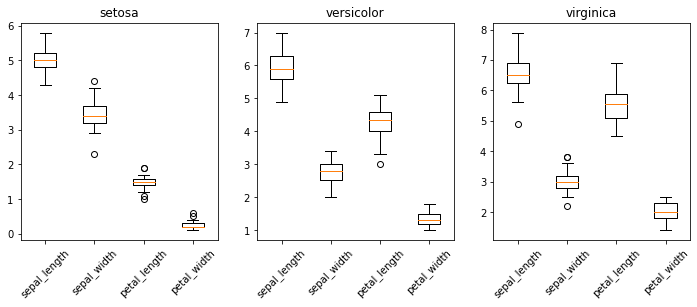

In [12]:
# an example to do the same with matplotlib
variables = df.columns[:-1].values # get the variables
labels = np.unique(df['species']) # get the unique labels

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs = axs.ravel() # this flattens the 2D grid into a list, in the case where you would add multiple rows (eg subplots(2,2))
for i, label in enumerate(labels): # enumerate numbers the list
    # withouth the ravel, we would have needed axs[i,j] if you have a subplot with more than one row.
    # for every label, we only take the variables and transpose the columns
    axs[i].boxplot(df[df['species'] == label][variables]) 

    # some esthetics
    axs[i].set_xticklabels(variables, rotation=45)
    axs[i].set_title(label)


The variable specification in `FacetGrid.map()` requires a positional argument mapping, but if the function has a data parameter and accepts named variable assignments, you can also use `FacetGrid.map_dataframe()`.
This is useful if we want to specify `hue`, for example. Let's test that with a histplot with a kde.

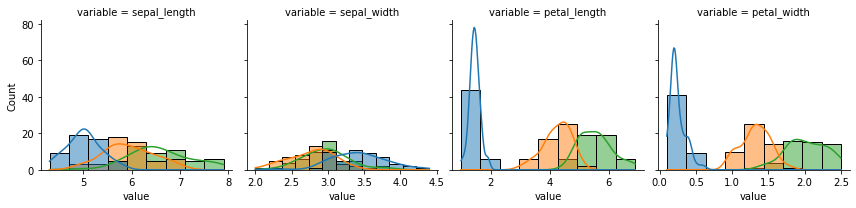

In [13]:
g = sns.FacetGrid(p, col='variable', sharex=False)
g.map_dataframe(sns.histplot, x='value', hue='species', kde=True)

If one variable between two species overlapes too much to separate the items (e.g. both flowers have typically an overlapping sepal_length) could you use another variable to still separate between the species?

We could try to spot linear relations with pairplot. But be carefull before you use this function, as it scales $O(n^2)$.

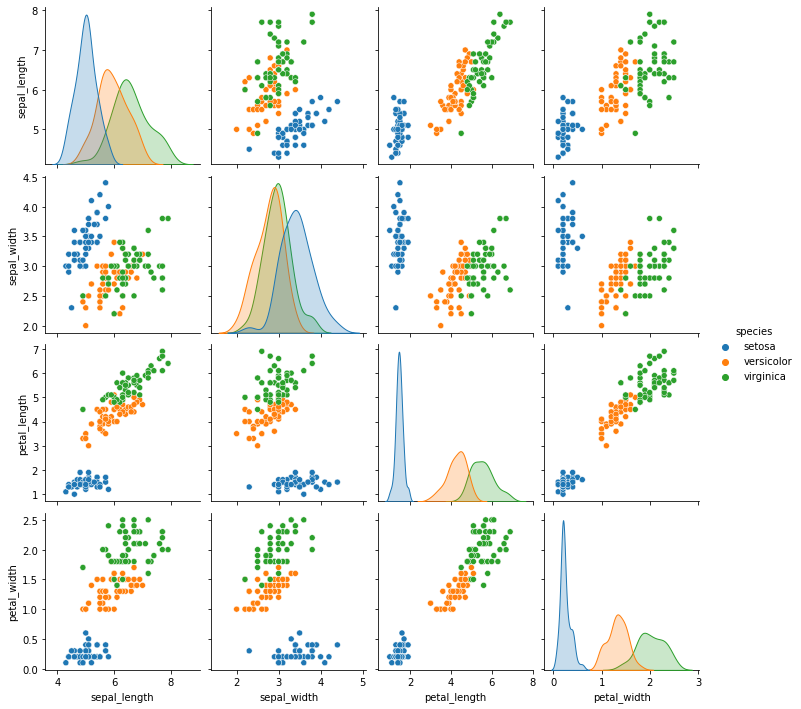

In [14]:
sns.pairplot(df, hue='species')

Depending on your dataset, you might want to explore the data in different ways. Exploring the data comes down to a three step process:

1. Ask yourself a question about the data. E.g., is there a relation between variable $x_1$ and $x_2$? How is the distibution of variable $x_3$? What are outliers? 
2. Try to answer this question roughly by visualising the data or looking at statistics.
3. Return to 1, unless there are no questions left.

In the case of the Iris dataset, the data is not that complex. But you will have to get creative in most cases, because there are lots of observations and simply shaking a `pairplot` out of you magic datascientist sleeve wont do the trick. More often than not, the data is too complex (with too many features) or too polluted to simply start with a pairplot.

## scaling
In the case of the iris dataset, the values of the variables are pretty close to eachother. But what to do if the variables are very far apart? Usually, a good idea is to transform the data to z-scores. These can be calculated as:

$$z = \frac{x - \mu}{\sigma}$$

Where $\mu$ is the mean value of the dataset and $\sigma$ the standard deviation.

This is implemented as a [standardscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) in sklearn

In [26]:
y = df['species'].values
data = df.drop('species', axis=1)
labels = list(data.columns)

We start by separating the target column as $y$ and the matrix as $X$. Because
the data object is still a pandas, but with the target column dropped, we can
obtain the numpy array by calling `.values`

In [27]:
X = data.values

But, we want to scale those values with the standardscaler.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.values)

This process can be abstracted away in a function. Look it up in the
`make_dataset.py` file. What do the typehints tell you?

In [29]:
X = make_dataset.scale(data.values)

2021-11-18 17:11:43.309 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


We now have an numpy array. A quick way to peek at the result would be to simply invoke matplotlib. But we might want to also color the data according to the labels. That can also be done with matplotlib, but generally the seaborn interface is more userfriendly for coloring.

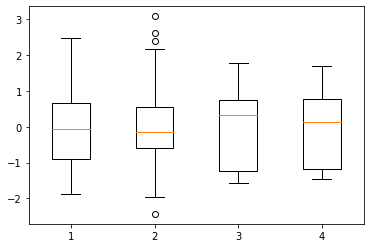

In [30]:
plt.boxplot(X);

To use seaborn, we could overwrite the dataframe we have with the scaled data, but we generally would want to avoid that. A cleaner way is to stitch it back into a dataframe, just for plotting, as to keep the original data intact.

<AxesSubplot:xlabel='variable', ylabel='value'>

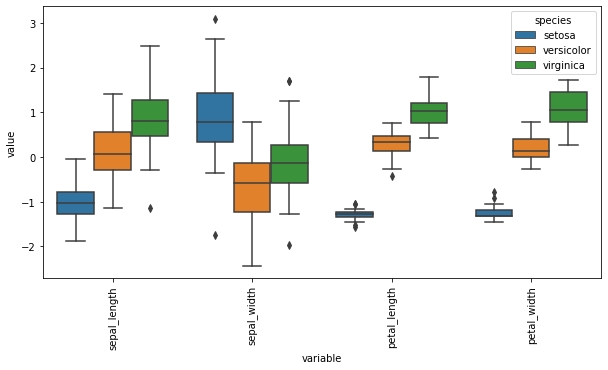

In [31]:
# stitch it back
p = pd.DataFrame(X, columns = labels)
p['species'] = y

# prepare for plotting
p = p.melt(id_vars='species')

# esthetics
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data = p, x = 'variable', y='value', hue='species')

Because we will want to do this more often, let's make the function a bit more
abstract. And let's store it inside the `visualization` folder. Look it up into
the `visualize.py` file. Again: what do you learn from the typehints?

Also, can you tell what we changed in the lines of code in the cell above? What
part of the code did I change to make the function more abstract? Also, would it
make sense to change the hardcoded values "variable" and "value" into parameters
too? Why (not)?

In [32]:
from src.visualization import visualize

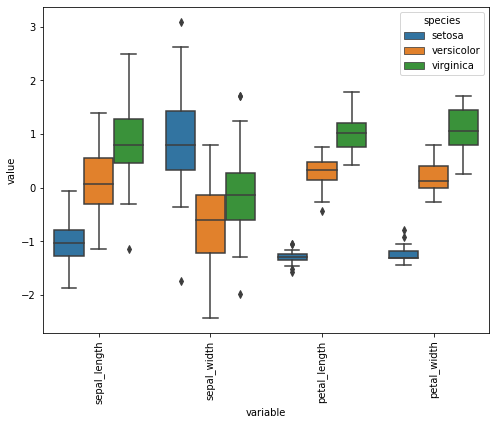

In [33]:
visualize.melted_boxplot(X=X, y=y, labels=labels, labelname="species")

In the case of the iris dataset, this wont make much difference. But if the scales are widely apart, it will help a lot (both for the visualisation and for the speed of a model).

### Step 2: Splitting data into train and test sets

Our goal is to predict the species of iris for a new data set of measurements. But before these predictions can be made we want to know how accurate the model works. In order to `evaluate` the model and to indicate whether it generalizes well we can show the model new data for which we have the labels. Usually this is done by splitting the labeled collected data into a `training set` and a `test set`. So the **`training set` is used to train the machine learning model** and the **`test set` will be used later to assess how well the model works**. 

If you want to hypertune the parameters of a model extensively, you should split the data into three datasets:

1. **training set** Used to train the model. Typically a large chunk, eg around 70 or 80 percent of the data
2. **validation set** Used to evaluate the different settings for a model. This is used to avoid overfitting a model. Typically about 15-20 %
3. **test set** Used to test the final model, after all hypertuning is done. Typically the same size as the validation set.


But for today, we will stick to just a train and test split.

Scikit-learn consistently expects a separate `X` matrix and `y` vector (Note that the capitalized X notation and lowercase y notation are inspired from mathematics notations for a matrix and vector), this shape is always assumed by scikit-learn.  

Let's split out the X and the y, and then split them again into a training set and a test set.

In [60]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Separate dataset into features X and labels y
X = df.drop(['species'], axis=1)
y = df['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
X_train.shape, X_valid.shape, X_test.shape

((105, 4), (22, 4), (23, 4))

This works, but it is very sensitive to mistakes. Typically, people will go back
and forwards in a notebook, running cells. The above cell only works because it
expects there to be a variable df. Oh, and we didnt scale it this time.

So, lets move all these functions to the `make_dataset` file, and collect them
into a wrapper function `main`.

In [35]:
(
    X_train, y_train, X_valid, y_valid, X_test, y_test
) = make_dataset.main(target="species", split=0.2)

2021-11-18 17:11:54.844 | INFO     | src.data.make_dataset:get_iris:12 - Obtained iris dataset
2021-11-18 17:11:54.852 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


Let's do a quick visualization to inspect the results of this train/test split.

We want to see if the train / test has actually split the data uniform.

What do you expect to see, if this is the case? 
And what do you expect to see, if this isn't the case?

In other words: what is your hypothesis, and how could it be confirmed by the data?
It is important to understand what you are looking for, and why, as to interpret the visualisation correctly.

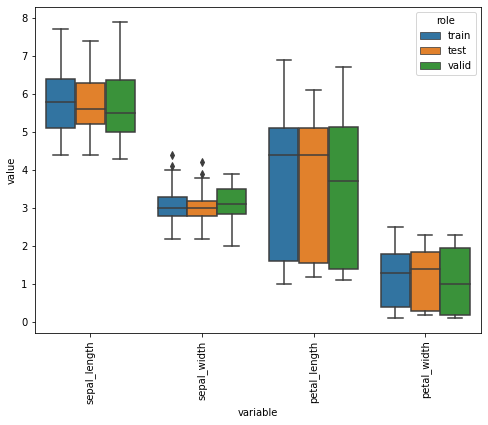

In [72]:
X = np.concatenate([X_train, X_test, X_valid])
y = ['train'] * len(X_train) + ['test'] * len(X_test) + ['valid'] * len(X_valid)
labels = list(df.columns[:-1])

visualize.melted_boxplot(X, y, labels, labelname="role")

Another way to do sort of the same would be this, using `.FacetGrid` from seaborn

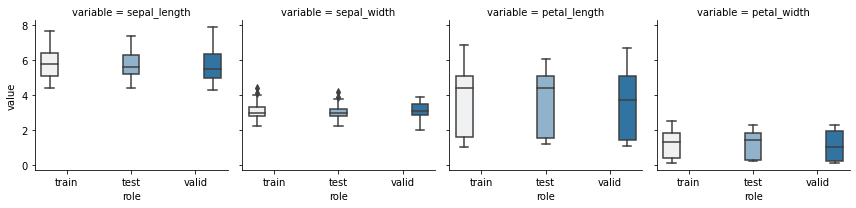

In [75]:
p = pd.DataFrame(X, columns=labels)
p['role'] = y
p = p.melt(id_vars='role')

g = sns.FacetGrid(p, col='variable')
g.map_dataframe(sns.boxplot, x='role', y='value', hue='role')

A quick recap:

* We have an X, y pair for training and for testing
* Next step: let's build a machine learning model!


## Grid Search with Cross-Validation

### Information Leaks

It's important to create an additional validation set next to the training and test set. When you are applying machine learning methods in practice choices made on the test set accuracy "leak" information from the test set into the model. 

Imagine your announcement to your datascience team that you made an absolutely fantastic model with 98% accuracy, only to find out later on that you overfitted and your model performs really poor on new data. That's something you want to avoid, I assume.

As you never want to leak any information to have a good generalization perspective it is important to always **keep an isolated validation set**, so the final evaluation of the model is completely independent.

### Manual Grid Search Workflow

In the code cell below you can see the overall workflow of running a grid search, and evaluating the final parameter for the example case we described above. What these parameters ($C$ and gamma ($\gamma$) is beyond the topic of this lesson and should be explained in a lesson that deals with SVM's.

In [76]:
from sklearn.svm import SVC
# Grid search over parameter grid, to find best parameters
best_score = 0 
# note that there are even more parameters for a SVC that we could play with. See sklearn documentation for more details.
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # Initialize SVC model for given combination of parameters
        svm = SVC(gamma=gamma, C=C)

        # Train on train set
        svm.fit(X_train, y_train)
    
        # Evaluate on test set 
        score = svm.score(X_valid, y_valid)

        # Store the best score 
        if score > best_score: 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma}


# Initiatize model with best parameters
# Note that '**' (dereference operator) is used to convert the dict into parameters
svm = SVC(**best_parameters)

# Train on train/validation set
svm.fit(X_valid, y_valid)

# Score on test set
test_score = svm.score(X_test, y_test)

# Print scores
print("Best score on validation set:         {:.2f}".format(best_score))
print("Best parameters:                     ", best_parameters)
print("Test set score with best parameters:  {:.2f}".format(test_score))

Best score on validation set:         1.00
Best parameters:                      {'C': 100, 'gamma': 0.01}
Test set score with best parameters:  0.91


In [77]:
svm

SVC(C=100, gamma=0.01)

While this works, scikit-learn has automated this for you. This is not just less work, it also guards you against errors. So. let's have a look at a more automated and robust version with **GridSearchCV**.

Although splitting the data into a training, validation and test set is workable, this approach can be sensitive to how exactly the data is split. Picking settings, based on just a very small set of 15% of the data is very sensitive to errors. So, for better generalization performance, cross-validation is a more sophisticated method to evaluate the performance of each parameter.

We will split again, and don't make a separate validation set: gridsearch will do that for us!

In [83]:
X_train, y_train, X_test, y_test = make_dataset.main(target = "species", validation=False)

2021-11-18 17:46:09.883 | INFO     | src.data.make_dataset:get_iris:12 - Obtained iris dataset
2021-11-18 17:46:09.889 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


Scikit-learn provides the **`GridSearchCV`** class, which implements a gridsearch with cross-validation in the form of an estimator. Before instantiating the `GridSearchCV` class, we need to specify the parameters of interest using a dictionary. In this dictionary the keys refer to the parameters we want to adjust and the values are the parameter settings we are interested in. 

In [84]:
# Set parameter grid
param_grid = {'C': [10**x for x in range(-4,3)],
              'gamma': [10**x for x in range(-4,3)]}
param_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

With this, we can run a fully automatied Cross validation Grid Search:

In [85]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3)

# Display GridSearchCV object
grid_search

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

`GridSearchCV` will perform all necessary model fits automatically. Moreover it will run cross validation for each combination of parameters that we specified and fit a new model on the whole training dataset with the best parameters that were found during the cross validation process.

In [86]:
# Do a Grid Search and automatically fit using best parameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [87]:
# Print best parameters and corresponding score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:  {}".format(best_parameters))
print("Best score:       {:.2f}".format(best_score))

Best parameters:  {'C': 1, 'gamma': 0.1}
Best score:       0.97


But wait, let's visualize what we did:

In [88]:
import sys
from utils import gridsearch_heatmap #in the parent directory, there is a file named utils.py from which we load this function.
gridsearch_heatmap(grid_search, param_grid, figsize=(8,8))

ModuleNotFoundError: No module named 'utils'

Okay, so we have a hotspot. But our scan is very rough: we went from $C=10$ to $C=100$. We will probably do this a bit more finegrained.

Usually, it is usefull to iterate this process. So let's wrap this in a function, and repeat this while zooming in on the heatmap. The process is this:

1. Make sure that your first gridsearch is large enough to have 'low performance' in the borders.
2. Zoom in on the hotspot, tuning up the gradient of the parameters. Make sure you dont overdo: 25 values for C and 25 values for gamma results in 25x25 combinations. This can take quite some time if you overdo this (eg a grid with 100 values of $C$ and 100 values of $\gamma$ results in 10.000 times fitting the SVC.)

In [58]:
# Set parameter grid
# zoom in on what looks like a usefull are for C and gamma
param_grid = {'C': [i for i in range(1, 100, 5)],
              'gamma': [i for i in np.linspace(1e-4, 1, 25)]}

# function to automate this process:
def search_and_fit(X_train, y_train, param_grid):
    grid_search = GridSearchCV(SVC(), param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    return grid_search

grid_search = search_and_fit(X_train, y_train, param_grid)

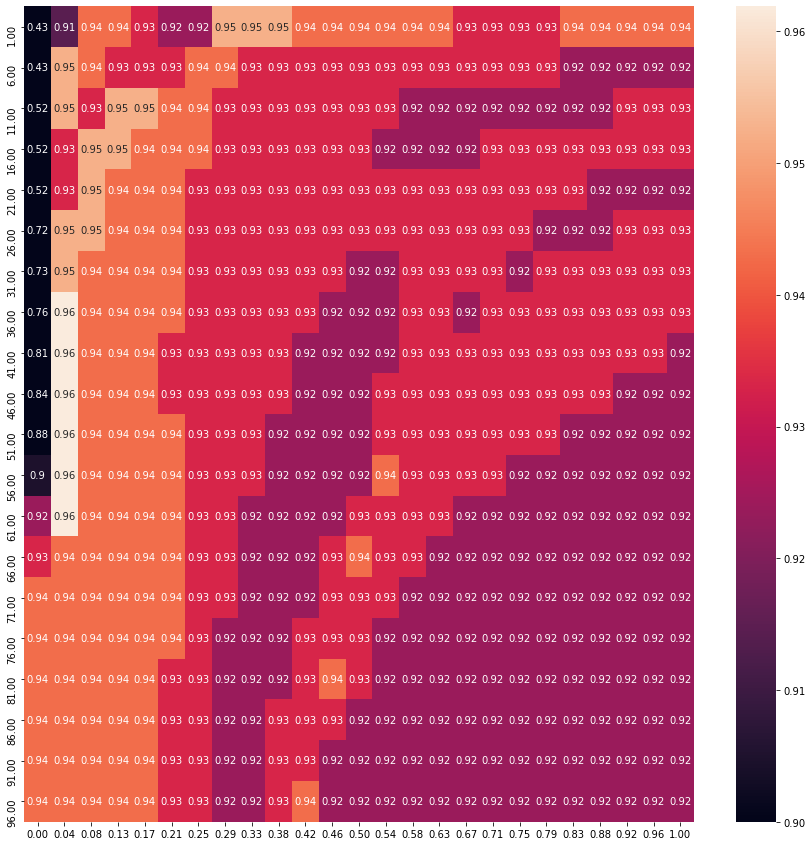

In [59]:
# often it is usefull to fiddle with the colors to increase the contrast.
gridsearch_heatmap(grid_search, param_grid, vmin = 0.9, figsize=(15,15))


In [60]:
# zoom in again
param_grid = {'C': [i for i in range(1, 50, 2)],
              'gamma': [i for i in np.linspace(0.08, 0.5, 25)]}

grid_search = search_and_fit(X_train, y_train, param_grid)

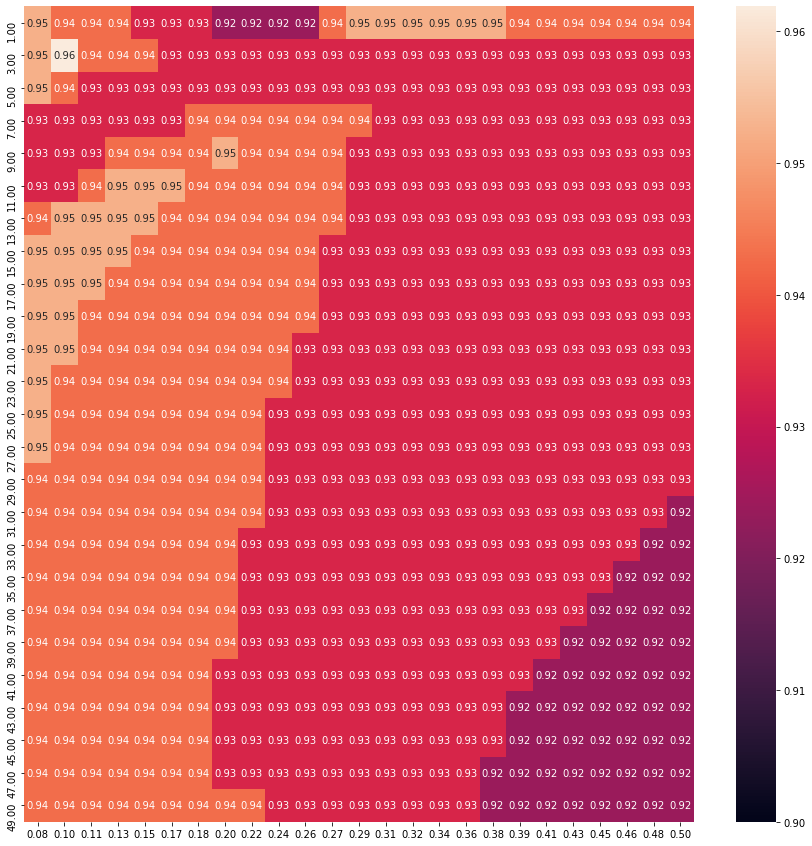

In [61]:
gridsearch_heatmap(grid_search, param_grid, vmin = 0.9, figsize=(15,15))

In [62]:
# Print best parameters and corresponding score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:  {}".format(best_parameters))
print("Best score:       {:.2f}".format(best_score))

Best parameters:  {'C': 3, 'gamma': 0.0975}
Best score:       0.96


A question that is not straightforward to answer, is: are the 'best parameters' returned by the grid search, actually the best parameters?

Look at the heatmap; you can see the whit spot in the left upper corner, which is the value that is returned as (0.1325, 3).

As you see, going just a bit higher, lets say to (0.1325, 1), will drop your performance with 2 percents.
A value somewhere in the area with $C = [11,23]$ seems to have a stable performance of about .955, at least for the region $\gamma = [0.08, 0.185]$. Picking the middle of this "Island of performance" might be a more stable setting when it comes to unseen data. If this is actually the case, depends on the datasets at hand. Without additional information, I would say that the area for $C = [11,23]$ is a safer guess for stable performance than picking $C = 3$.

# Adding pipelines
Another usefull feature is to create a pipeline of functions.

In [63]:
# let's start with the original, unscaled, dataset.
df = sns.load_dataset("iris")
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.pipeline import Pipeline
# Build pipeline
pipe = Pipeline(
    [
        ("scaler", StandardScaler()), # we add a scaler
        ("svm", SVC()) # and a model
    ]
)

Here, you see combined the scaler and the SVC. You can add more functions to that. A Pipeline takes a list of name-estimator pairs. All but the last one must be transformers (meaning, they must have a `fit_transform()` method).

Calling `fit()` on the pipe calls the `fit_transform()` methods sequentially, and `fit()` on the final method.

In [64]:
# note the double underscore in the parameter names. This refers to the name-estimator pairs in the pipeline.
param_grid = {'svm__C': [i for i in range(1, 50, 2)],
              'svm__gamma': [i for i in np.linspace(0.08, 0.5, 25)]}

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

# Print results (CV accuracy, test set score, best parameters)
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9640316205533598
1.0
{'svm__C': 1, 'svm__gamma': 0.20249999999999999}


In principle, this is exectly the same as what we did before. It just wraps more into a solid architecture, making sure that all steps in the datapreparation are executed in the right sequence.

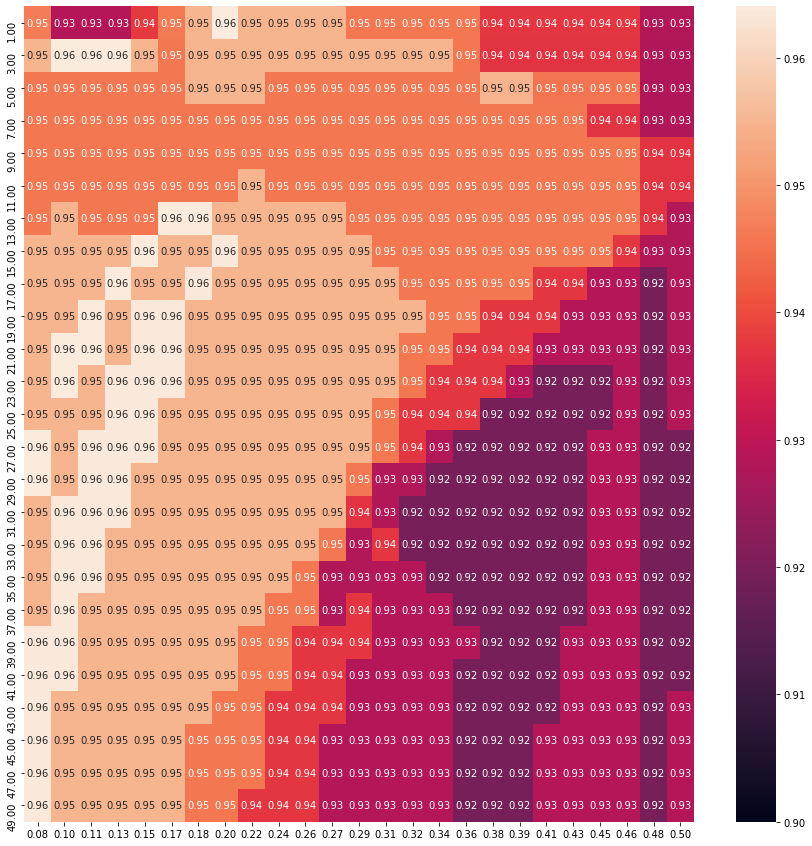

In [67]:
gridsearch_heatmap(gridsearch, param_grid, vmin=0.9, figsize=(15,15))